In [22]:
from rfgap import RFGAP
from dataset import dataprep

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

In [23]:
# Read in the data
data   = pd.read_csv('../datasets/titanic.csv', sep = ',')
x, y   = dataprep(data)
n, d   = x.shape
n_classes = len(y.unique())

# inds = list(range(25)) + list(range(50, 100)) + list(range(125, 150))
# y = y.iloc[inds]
# x = x[inds, :]

In [24]:
rfgap = RFGAP(y = y, weighted = False, oob_score = True, class_weight = None, random_state = 0, non_zero_diagonal=False, prox_method = 'rfgap')

rfgap_balanced = RFGAP(y = y, weighted = False, oob_score = True, class_weight = 'balanced', random_state = 0, prox_method = 'rfgap')

In [25]:
rfgap.fit(x, y)
rfgap_balanced.fit(x, y)

In [26]:
prox = rfgap.get_proximities()
prox_balanced = rfgap_balanced.get_proximities()

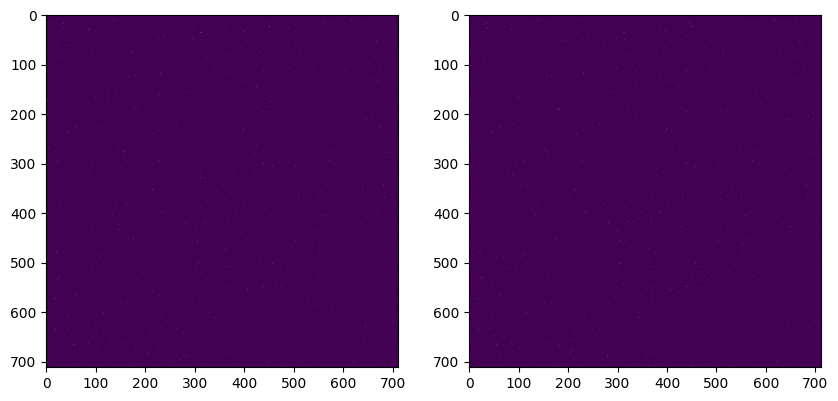

In [27]:
fit, axes = plt.subplots(1, 2, figsize = (10, 5))

axes[0].imshow(prox.toarray())
axes[1].imshow(prox_balanced.toarray())


In [28]:
prox_preds = rfgap.prox_predict(y)
prox_preds_balanced = rfgap_balanced.prox_predict(y)

In [29]:
oob_preds = np.argmax(rfgap.oob_decision_function_, axis = 1)
oob_preds_balanced = np.argmax(rfgap_balanced.oob_decision_function_, axis = 1)

In [30]:
# Proximity prediction accuracy

print('proximity prediction accuracy')
print(np.sum(prox_preds == y)/ len(y))
print(np.sum(prox_preds_balanced == y)/ len(y))

print(f1_score(y, prox_preds, average = 'macro'))
print(f1_score(y, prox_preds_balanced, average = 'macro'))

proximity prediction accuracy
0.7949438202247191
0.797752808988764
0.786198499407661
0.7878268643373314


In [31]:
# OOB Scores

print('oob_score')
print(rfgap.oob_score_)
print(rfgap_balanced.oob_score_)

oob_score
0.7949438202247191
0.797752808988764


In [32]:
# OOB Match?

print('oob_match')
print(np.sum(oob_preds == prox_preds)/ len(y))
print(np.sum(oob_preds_balanced == prox_preds_balanced)/ len(y))

oob_match
1.0
0.9971910112359551


In [33]:
from sklearn.metrics import pairwise_distances
p = prox.toarray()

d = pairwise_distances(p, metric = 'cosine')

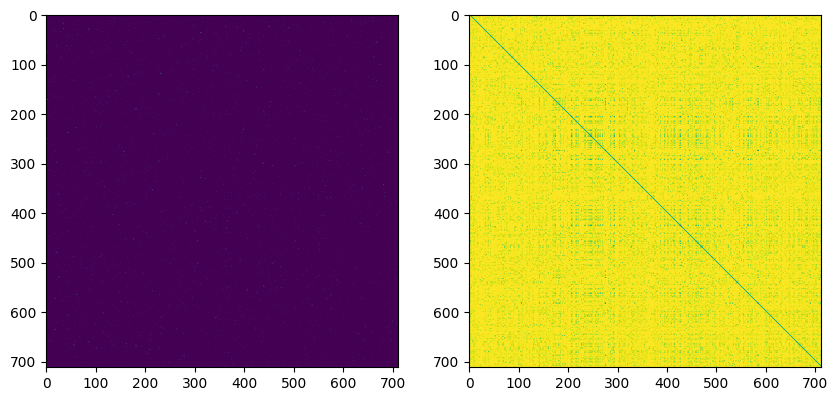

In [34]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].imshow(p)
axes[1].imshow(d)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'precomputed')


knn.fit(d, y)

KNeighborsClassifier(metric='precomputed')

In [36]:
rfgap.predict_proba(x)

array([[0.89166667, 0.10833333],
       [0.        , 1.        ],
       [0.08      , 0.92      ],
       ...,
       [0.02      , 0.98      ],
       [0.17      , 0.83      ],
       [0.91      , 0.09      ]])

In [37]:
knn.predict_proba(d)

array([[1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       ...,
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ]])

In [38]:
np.sum(knn.predict(d) == prox_preds)/ len(y)

0.8553370786516854

In [39]:
np.sum(knn.predict(d) == y)/ len(y)

0.8553370786516854

In [40]:
from phate import PHATE

phate_op = PHATE(n_components = 2, random_state = 0, knn_dist = 'precomputed')
rfphate_op = PHATE(n_components = 2, random_state = 0, knn_dist = 'precomputed_affinity')
emb = phate_op.fit_transform(d)


rf_emb = phate_op.fit_transform(prox)




Calculating PHATE...
  Running PHATE on precomputed distance matrix with 712 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.03 seconds.
  Calculating optimal t...
    Automatically selected t = 12
  Calculated optimal t in 0.38 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.44 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.39 seconds.
Calculated PHATE in 1.25 seconds.
Calculating PHATE...
  Running PHATE on precomputed distance matrix with 712 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.02 seconds.
  Calculating optimal t...


/home/rhodes8/anaconda3/envs/rfgap/lib/python3.12/site-packages/graphtools/graphs.py:1038: RuntimeWarning: divide by zero encountered in divide
  pdx = (pdx.T / bandwidth).T
/home/rhodes8/anaconda3/envs/rfgap/lib/python3.12/site-packages/graphtools/graphs.py:1038: RuntimeWarning: invalid value encountered in divide
  pdx = (pdx.T / bandwidth).T


    Automatically selected t = 2
  Calculated optimal t in 0.28 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.09 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.41 seconds.
Calculated PHATE in 0.82 seconds.


<Axes: >

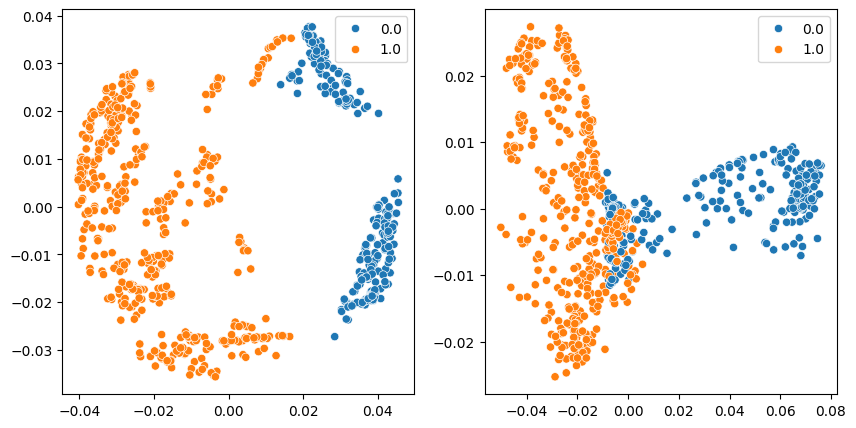

In [41]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
# sns.scatterplot(x = emb[:, 0], y = emb[:, 1], hue = x[:, 0], ax = axes[0])
# sns.scatterplot(x = rf_emb[:, 0], y = rf_emb[:, 1], hue = x[:, 0], ax = axes[1])

sns.scatterplot(x = emb[:, 0], y = emb[:, 1], hue = x[:, 1], ax = axes[0])
sns.scatterplot(x = rf_emb[:, 0], y = rf_emb[:, 1], hue = x[:, 1], ax = axes[1])

In [42]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C
